# Influence of financial development on the broad money vs inflation correlation


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Country / Country Code


In [70]:
country_metadata = pd.read_csv("country_code.csv",sep = ';')
country_code = country_metadata[['ISO Code','Country']].drop_duplicates()

# Creates dictionnairys that links countries and countries` codes
country_dict = country_code.set_index('ISO Code').to_dict()['Country']
code_dict = country_code.set_index('Country').to_dict()['ISO Code']

In [71]:
country_dict['BRA']

'Brazil'

In [72]:
code_dict['Brazil']

'BRA'

## Market Capitalization 
World Federation of Exchanges

In [73]:
market_cap = pd.read_csv("market_cap.csv",sep = ';') 
# Sum all exchanges markets from the same country
countries_cap = market_cap[['Country']+[str(year) for year in range(2000,2021)]].groupby("Country").sum()
# Get Country Code
countries_cap['code'] = countries_cap.index.to_series().map(code_dict)
print('Countries without IMF Data: ',countries_cap[countries_cap['code'].isna()].index.values) # Countries without IMF Data
#countries_cap = pd.merge(countries_cap, country_code, how='outer', left_on = 'Country', right_on='country').iloc[:100]
flag = (countries_cap['code'].isna() == False) # Countries with IMF Data
# Exclude countries without IMF Data
countries_cap = countries_cap[flag].set_index('code').T
countries_cap.index = pd.to_datetime(countries_cap.index, format='%Y')

Countries without IMF Data:  ['Bermuda' 'Cayman Island' 'Europe' 'Palestine']


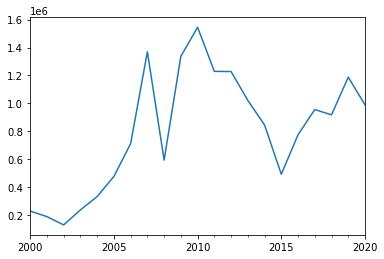

In [74]:
countries_cap.BRA.plot()

## Financial Development Index
International Monetary Fund


In [75]:
fd_index = pd.read_csv("FD_IMF.csv",sep = ';') 

In [76]:
fd_index = fd_index[fd_index['year'] >= 2000].groupby('code').mean().drop(['ifs','year'],axis=1).T

In [77]:
fd_index

code,ABW,AGO,ALB,AM,ARE,ARG,ARM,ATG,AUS,AUT,...,UZB,VCT,VEN,VNM,VUT,WSM,Western Hemisphere,YEM,ZAF,ZMB
FD,0.284211,0.135263,0.174737,0.640526,0.426316,0.307895,0.173684,0.297895,0.902632,0.657895,...,0.176842,0.206842,0.205789,0.383158,0.165263,0.177895,0.297368,0.120000,0.555263,0.107368
FI,0.552632,0.225263,0.335789,0.716316,0.370526,0.330526,0.322632,0.586316,0.925263,0.723684,...,0.321579,0.405789,0.332632,0.340000,0.324737,0.348947,0.437368,0.221053,0.656842,0.183684
FM,0.003684,0.041053,0.002632,0.540000,0.464211,0.272632,0.018947,0.000000,0.844737,0.566316,...,0.024737,0.000000,0.071053,0.412105,0.000000,0.000000,0.147895,0.015789,0.434211,0.025789
FID,0.236316,0.057895,0.085789,0.605263,0.165263,0.172632,0.055789,0.340526,0.922632,0.631579,...,0.010000,0.276316,0.113684,0.217368,0.103158,0.072632,0.282632,0.021053,0.813158,0.079474
FIA,0.726316,0.107895,0.303684,0.670526,0.352632,0.251579,0.341053,0.674211,0.841053,0.649474,...,0.471579,0.333684,0.323684,0.091053,0.324737,0.360526,0.394737,0.034737,0.303158,0.068947
FIE,0.578947,0.550526,0.631053,0.714211,0.573684,0.562632,0.568947,0.630526,0.768421,0.738421,...,0.446316,0.565789,0.554737,0.754737,0.530526,0.608947,0.580000,0.696842,0.738421,0.435789
FMD,0.009474,0.104211,0.012105,0.558947,0.425789,0.104211,0.016316,0.000000,0.903158,0.440526,...,0.044211,0.000000,0.141579,0.157895,0.000000,0.000000,0.160526,0.041053,0.652632,0.061579
FMA,0.000000,0.008947,0.000000,0.523684,0.631579,0.635789,0.038947,0.000000,0.780526,0.836316,...,0.028947,0.000000,0.006842,0.384737,0.000000,0.000000,0.168421,0.000000,0.267368,0.000000
FME,0.000000,0.000000,0.000000,0.524737,0.331053,0.096316,0.000000,0.000000,0.822105,0.424737,...,0.000000,0.000000,0.055263,0.730526,0.000000,0.000000,0.104737,0.000000,0.334737,0.008421


## Inflation
International Monetary Fund

In [78]:
price_index = pd.read_csv("price_index_IMF.csv",sep = ';') 

In [79]:
price_index = price_index[price_index['Attribute'] == 'Value'][['Country Name']+[str(year) for year in range(2000,2021)]]
price_index['Country Name'] = price_index['Country Name'].str.split(';').str[0]
price_index = price_index.set_index('Country Name')
price_index['code'] = price_index.index.to_series().map(code_dict)
print('Countries without IMF Data: ',price_index[price_index['code'].isna()].index.values) # Countries without IMF Data
flag = (price_index['code'].isna() == False) # Countries with IMF Data
# Exclude countries without IMF Data
price_index = price_index[flag].set_index('code')
price_index = price_index.astype(float).T
price_index.index = pd.to_datetime(price_index.index, format='%Y')
price_index = price_index.dropna(how='any',axis=1)

Countries without IMF Data:  ['Cayman Islands' "Côte d'Ivoire" 'West Bank and Gaza' 'Gambia'
 'Czech Rep.' 'Bahamas' 'Slovak Rep.' 'Dominican Rep.' 'Montserrat'
 'British Virgin Islands' 'Eswatini' 'North Macedonia' 'Anguilla' 'Aruba'
 'São Tomé and Príncipe' 'Guadeloupe' 'Martinique' 'Kyrgyz Rep.' 'Congo'
 'New Caledonia' "Lao People's Dem. Rep." 'Sint Maarten'
 'Syrian Arab Rep.' 'Curaçao' 'Congo' 'Central African Rep.' 'Nauru']


In [80]:
price_index.head()

code,NOR,BRA,CHE,RUS,LTU,LVA,FRA,CAN,TUR,FIN,...,KOR,PRT,NLD,CRI,SEN,MDG,TTO,ROM,POL,MDA
2000-01-01,75.450000,1636.098333,94.035275,30.759554,69.133150,55.021531,79.929167,95.375000,36.741170,79.125435,...,66.571667,73.720167,75.055000,30.602750,77.539894,25.508712,38.695247,28.004167,86.402755,23.237564
2001-01-01,77.716667,1748.013333,94.965300,37.365786,70.078283,56.389938,81.235833,97.783333,56.728436,81.165638,...,69.278750,76.941667,78.174167,34.047333,79.846319,27.528223,40.837669,37.659167,91.075706,25.506633
2002-01-01,78.716667,1895.723333,95.575650,43.265369,70.275558,57.483269,82.798333,99.991667,82.235878,82.440928,...,71.192583,79.711833,80.744167,37.168250,81.712568,32.069974,42.532456,46.147500,92.810955,26.858802
2003-01-01,80.675000,2174.677500,96.185708,49.176843,69.478417,59.174799,84.535833,102.750000,100.000833,83.164298,...,73.694917,82.277750,82.433333,40.680000,81.670080,31.523500,44.153413,53.195833,93.444577,30.013658
2004-01-01,81.041667,2318.145000,96.957967,54.531521,70.287217,62.839131,86.346667,104.658333,108.599167,83.319916,...,76.341000,84.223917,83.475000,45.689667,82.090503,35.922857,45.796605,59.512500,96.605477,33.772652


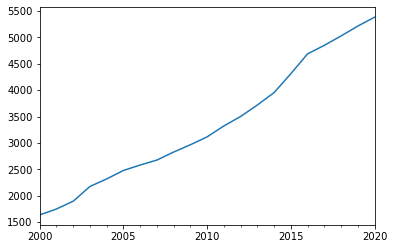

In [81]:
price_index.BRA.plot()

In [82]:
inflation = (price_index - price_index.shift(1))/price_index.shift(1)
inflation.head()

code,NOR,BRA,CHE,RUS,LTU,LVA,FRA,CAN,TUR,FIN,...,KOR,PRT,NLD,CRI,SEN,MDG,TTO,ROM,POL,MDA
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,0.030042,0.068404,0.009890,0.214770,0.013671,0.024870,0.016348,0.025251,0.544002,0.025784,...,0.040664,0.043699,0.041558,0.112558,0.029745,0.079169,0.055367,0.344770,0.054083,0.097647
2002-01-01,0.012867,0.084502,0.006427,0.157887,0.002815,0.019389,0.019234,0.022584,0.449641,0.015712,...,0.027625,0.036003,0.032875,0.091664,0.023373,0.164985,0.041501,0.225399,0.019053,0.053012
2003-01-01,0.024878,0.147149,0.006383,0.136633,-0.011343,0.029426,0.020985,0.027586,0.216024,0.008774,...,0.035149,0.032190,0.020920,0.094483,-0.000520,-0.017040,0.038111,0.152735,0.006827,0.117461
2004-01-01,0.004545,0.065972,0.008029,0.108886,0.011641,0.061924,0.021421,0.018573,0.085983,0.001871,...,0.035906,0.023654,0.012636,0.123148,0.005148,0.139558,0.037215,0.118744,0.033826,0.125243


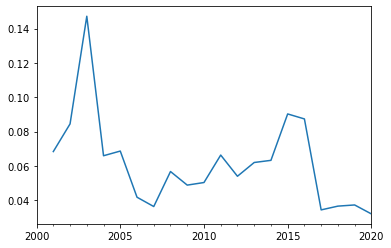

In [83]:
inflation.BRA.plot()
#inflation = inflation[-11:]


## Monetary Aggregates
OCDE (M1 & M3) + World Bank (M3)

In [84]:
M1_ocde_raw = pd.read_csv("M1_OCDE.csv",sep = ';')
M3_ocde_raw = pd.read_csv("M3_OCDE.csv",sep = ';')

M1_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M1_ocde_raw.LOCATION.unique()}
M3_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M3_ocde_raw.LOCATION.unique()}

for index, row in M1_ocde_raw.iterrows():
    M1_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']

for index, row in M3_ocde_raw.iterrows():
    M3_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']


M1_ocde = pd.DataFrame.from_dict(M1_ocde_dict)
M1_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')
M3_ocde = pd.DataFrame.from_dict(M3_ocde_dict)
M3_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')

In [85]:
M1_ocde.head()

,AUS,CAN,CZE,DNK,HUN,ISL,JPN,KOR,MEX,NZL,...,COL,CRI,IND,IDN,ISR,RUS,ZAF,OECD,OECDE,EA19
2000-01-01,18.76786,29.28147,20.24264,38.01241,20.53272,16.33402,46.71507,28.33863,15.96037,34.98002,...,13.94206,NaN,14.89199,13.25959,9.747102,4.556386,19.85736,28.53280,16.89676,31.76884
2001-01-01,21.59654,32.19206,22.77059,39.04982,23.18316,16.42490,50.69358,33.51904,18.31561,40.14391,...,15.70789,NaN,16.55491,15.97713,11.093320,6.924253,21.76143,31.07184,19.86309,34.03704
2002-01-01,28.34892,35.36032,26.15493,41.73394,27.43054,17.90695,64.63502,41.46779,21.76995,45.63920,...,18.86261,14.37509,18.46166,17.55188,12.872630,9.329021,25.93628,35.05837,22.72057,36.66444
2003-01-01,32.18549,36.72045,30.58028,45.07611,31.98979,21.87142,69.84149,44.16972,24.35896,49.60818,...,21.88685,17.35774,21.01543,19.68133,12.918790,13.088390,26.47052,38.24948,26.31899,40.59911
2004-01-01,34.84903,39.72519,34.36931,48.98291,33.85900,28.61759,72.74577,47.66790,27.76016,53.77688,...,25.16684,22.59781,24.76314,22.44134,15.184700,18.654890,30.54467,41.53373,30.84160,44.41516


In [86]:
M1_ocde.columns

Index(['AUS', 'CAN', 'CZE', 'DNK', 'HUN', 'ISL', 'JPN', 'KOR', 'MEX', 'NZL',
       'NOR', 'POL', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN',
       'COL', 'CRI', 'IND', 'IDN', 'ISR', 'RUS', 'ZAF', 'OECD', 'OECDE',
       'EA19'],
      dtype='object')

In [87]:

for country in M1_ocde.columns:
    M1_ocde[country] = ((M1_ocde[country] - M1_ocde[country].shift(1))/M1_ocde[country])
M1_ocde = M1_ocde.iloc[1:] # Exclude first row

for country in M3_ocde.columns:
    M3_ocde[country] = ((M3_ocde[country] - M3_ocde[country].shift(1))/M3_ocde[country]) 
M3_ocde = M3_ocde.iloc[1:] # Exclude first row

In [88]:
M1_ocde.head()

,AUS,CAN,CZE,DNK,HUN,ISL,JPN,KOR,MEX,NZL,...,COL,CRI,IND,IDN,ISR,RUS,ZAF,OECD,OECDE,EA19
2001-01-01,0.130978,0.090413,0.111018,0.026566,0.114326,0.005533,0.078482,0.154551,0.128592,0.128634,...,0.112417,NaN,0.100449,0.170089,0.121354,0.341967,0.087497,0.081715,0.149339,0.066639
2002-01-01,0.238188,0.089599,0.129396,0.064315,0.154841,0.082764,0.215695,0.191685,0.158675,0.120407,...,0.167247,NaN,0.103282,0.089720,0.138224,0.257773,0.160966,0.113711,0.125766,0.071661
2003-01-01,0.119202,0.037040,0.144713,0.074145,0.142522,0.181263,0.074547,0.061172,0.106286,0.080007,...,0.138176,0.171834,0.121519,0.108196,0.003573,0.287229,0.020182,0.083429,0.136723,0.096915
2004-01-01,0.076431,0.075638,0.110245,0.079758,0.055206,0.235735,0.039924,0.073386,0.122521,0.077518,...,0.130330,0.231884,0.151342,0.122988,0.149223,0.298394,0.133383,0.079074,0.146640,0.085918
2005-01-01,0.085079,0.060055,0.075341,0.149577,0.127108,0.234104,0.044488,0.084674,0.099611,0.050885,...,0.156188,0.199338,0.143880,0.127238,0.146639,0.230183,0.124851,0.059758,0.128051,0.118922


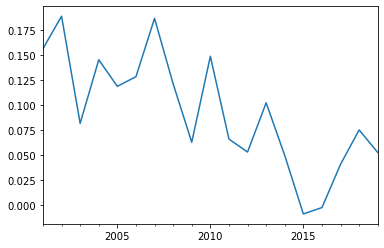

In [89]:
M1_ocde.BRA.plot()

# M x Inflation Correlation

## Standardize Time Series Data

In [90]:
from sklearn.preprocessing import StandardScaler

for country in M1_ocde.columns:
    scaler = StandardScaler()

    # prepare data for standardization
    values = M1_ocde[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    M1_ocde[country] = scaler.transform(values)

for country in M3_ocde.columns:
    scaler = StandardScaler()
    
    # prepare data for standardization
    values = M3_ocde[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    M3_ocde[country] = scaler.transform(values)

for country in inflation.columns:
    scaler = StandardScaler()
    # prepare data for standardization
    values = inflation[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    inflation[country] = scaler.transform(values)

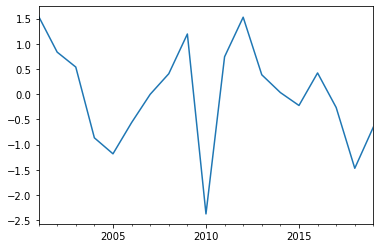

In [91]:
M3_ocde.USA.plot()

## Correlation (Pearson's R)

In [103]:
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from datetime import date

def validate_data(M, infl, s = 0):

    M_f = M.first_valid_index()
    M_l = M.last_valid_index()
    in_f = infl.shift(s).first_valid_index()
    in_l = infl.shift(s).last_valid_index()
    f = max(M_f,in_f)
    l = min(M_l,in_l)
    M = M[(M.index>=f) & (M.index<=l)]
    infl = infl.shift(s)[(infl.index>=f) & (infl.index<=l)]
    return M, infl

def find_correlation(M, infl, s = 0,without_tendency = True):

    M, infl = validate_data(M, infl, s)

    if without_tendency:
        f = exp_fit(infl)
        D = lambda x: x.year - min(infl.index.year) + 1

        R, alpha = pearsonr(M.values - f(D(infl.index)) ,infl.values - f(D(infl.index)))
    else:
        R, alpha = pearsonr(M.values ,infl.values)

    return R, alpha

def exp_fit(data):
    D = lambda x: x.year - min(data.index.year) + 1
    x = D(data.index)
    y = data.values
    f = lambda x,a,b,c: a + b*np.log(c*x) 
    r = curve_fit(f, x, y)
    a, b, c = r[0][0], r[0][1], r[0][2]
    f = lambda x: a + b*np.log(c*x)  
    return f

def plot_exp_fit(data):
    f = exp_fit(data)
    D = lambda x: x.year - min(data.index.year) + 1
    x = D(data.index)
    plt.plot(data.index,f(x),label = 'exp fit')

def plot_country(country,s = 0):
    M1 = M1_ocde[country]
    M3 = M3_ocde[country]
    infl = inflation[country]

    M1, infl = validate_data(M1, infl, s)
    M3, infl = validate_data(M3, infl, s)
    M1, infl = validate_data(M1, infl, s)

    f = exp_fit(infl)
    D = lambda x: x.year - min(infl.index.year) + 1

    R, alpha = pearsonr(M1.values - f(D(infl.index)) ,infl.values - f(D(infl.index)))
    print('correlation M1:',R)

    R, alpha = pearsonr(M3.values - f(D(infl.index)) ,infl.values - f(D(infl.index)))
    print('correlation M3:',R)

    plt.plot(M1.index,M1.values,label='M1')
    plt.plot(M3.index,M3.values,label='M3')
    plt.plot(infl.index,infl.values,label='inflation')
    plot_exp_fit(infl)
    plt.legend()
    plt.show()



ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
correlation M1: 0.11845104139470825
correlation M3: 0.6596689999710609


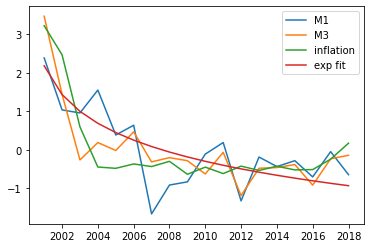

In [104]:
plot_country('TUR',s=0) # Undeveloped countries problem

ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
correlation M1: -0.5823104432965874
correlation M3: -0.23066607107559717
ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log


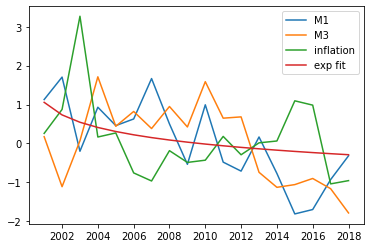

In [105]:
plot_country('BRA',s=0) 

ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
correlation M1: -0.32190816102783376
correlation M3: -0.2642636839555666


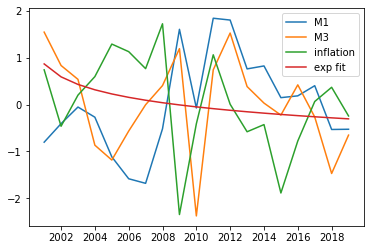

In [106]:
plot_country('USA',s=0) # Delay problem

ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log
correlation M1: -0.5827480084035598
correlation M3: 0.3400148153781628
ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log


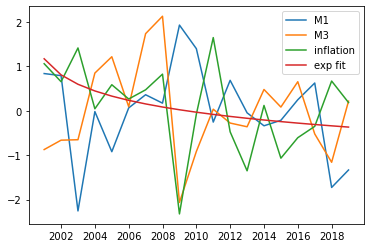

In [107]:
plot_country('CAN',s=0) # Delay problem

In [112]:
correlation = dict()

for country in list(set(M1_ocde.columns) & set(inflation.columns)):

    M1_R, M1_alpha = find_correlation(M1_ocde[country],inflation[country],s=0,without_tendency=True)
    M3_R, M3_alpha = find_correlation(M3_ocde[country],inflation[country],s=0,without_tendency=True)
    correlation[country] = {'M1_R':M1_R, 'M1_alpha':M1_alpha, 'M3_R':M3_R, 'M3_alpha':M3_alpha}

correlation = pd.DataFrame.from_dict(correlation)

ipykernel_launcher:35: RuntimeWarning: invalid value encountered in log


In [113]:
correlation

,KOR,CHN,CHE,SWE,ZAF,ISR,NZL,DNK,HUN,TUR,...,CAN,POL,IDN,ISL,USA,CHL,RUS,MEX,BRA,CRI
M1_R,-0.383960,0.043630,-0.319560,-0.261205,-0.109639,-0.073522,-0.270064,-0.287379,-0.515965,0.118451,...,-0.582748,-0.444236,0.111414,0.359991,-0.321908,-0.224005,-0.544587,-0.354907,-0.586144,0.577876
M1_alpha,0.104603,0.863518,0.196129,0.295119,0.664962,0.764848,0.263480,0.232876,0.023736,0.639698,...,0.008834,0.056717,0.659843,0.130045,0.178945,0.371548,0.019448,0.148405,0.008354,0.015117
M3_R,-0.153099,0.009777,-0.279439,0.273600,0.101659,-0.218630,0.033690,0.039915,-0.034600,0.659669,...,0.340015,0.429123,0.297310,0.449055,-0.264264,0.645538,0.058145,0.100885,-0.230666,0.703619
M3_alpha,0.531482,0.969287,0.261436,0.271950,0.678789,0.368525,0.894423,0.875048,0.888168,0.002896,...,0.154353,0.075559,0.230858,0.053773,0.274271,0.003810,0.813090,0.690402,0.357113,0.001623


In [116]:
print("Average M1 X INFL Correlation:",correlation.T.M1_R.mean()) # Taylor`s rule (Central bank reacts to deflaction)
print("Average M3 X INFL Correlation:",correlation.T.M3_R.mean()) 

Average M1 X INFL Correlation: -0.20836800701127686
Average M3 X INFL Correlation: 0.1209813642607111


## FD Index vs Correlation

In [117]:
versus = correlation.append(fd_index)
versus = versus.dropna(axis=1)
versus = versus.T
versus = versus[['FD','M1_R','M3_R']]

Regression FD X (M1 X INFL Correlation) p-value: 0.15381771251249082


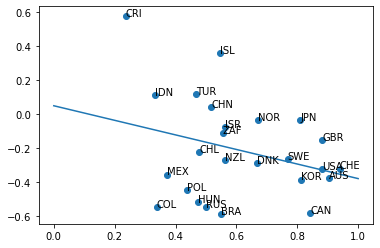

In [133]:
from scipy import stats
import matplotlib.pyplot as plt

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(versus['FD'],versus['M1_R'])
versus
print('Regression FD X (M1 X INFL Correlation) p-value:',p_value_x)

x = np.linspace(0,1)
y = slope_x * x + intercept_x
fig, ax = plt.subplots()
plt.xlabel = 'FD Index'
plt.ylabel = 'Inflation / M1 Correlation '
plt.plot(x,y)
plt.scatter(x=versus['FD'],y=versus['M1_R'])
for ind, fd in versus.iterrows():
    ax.annotate(ind,fd[['FD','M1_R']])
plt.show()

Regression FD X (M3 X INFL Correlation) p-value: 0.0768345332849275


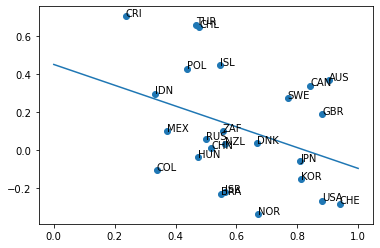

In [132]:
slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(versus['FD'],versus['M3_R'])
versus
print('Regression FD X (M3 X INFL Correlation) p-value:',p_value_x)

x = np.linspace(0,1)
y = slope_x * x + intercept_x
fig, ax = plt.subplots()
plt.xlabel = 'FD Index'
plt.ylabel = 'Inflation / M3 Correlation '
plt.plot(x,y)
plt.scatter(x=versus['FD'],y=versus['M3_R'])
for ind, fd in versus.iterrows():
    ax.annotate(ind,fd[['FD','M3_R']])
plt.show()